In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [7]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
datasub= data.loc[:,['Age','Annual Income (k$)']]

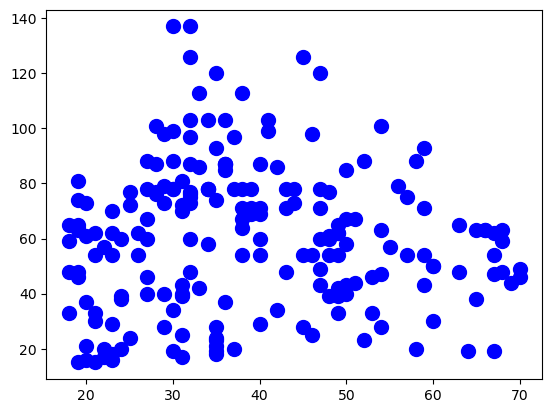

In [10]:
plt.figure(figure=(6,6))
plt.scatter(datasub[['Age']],datasub[["Annual Income (k$)"]],s=100,c='blue')

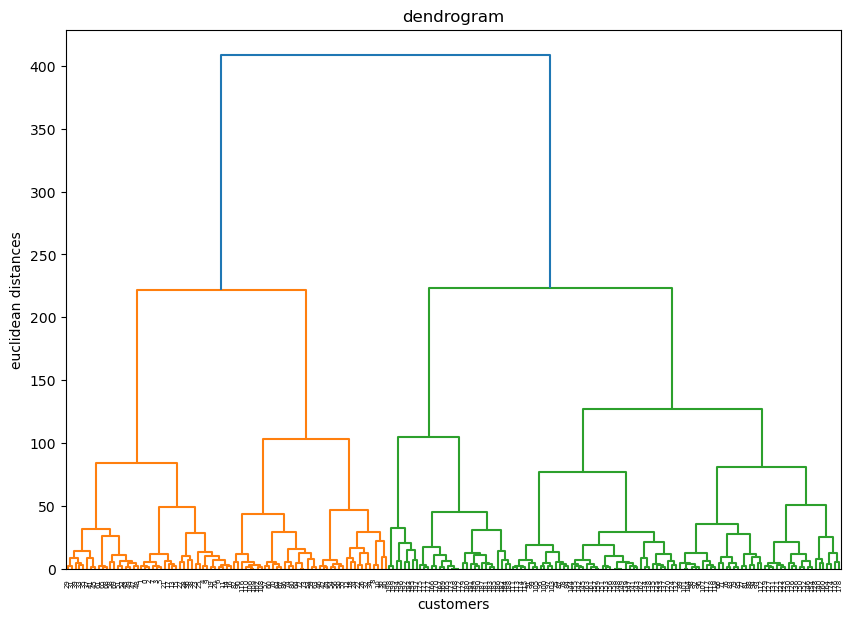

In [11]:
plt.figure(figsize=(10,7))
dendrogram=sch.dendrogram(sch.linkage(datasub,method="ward"))
plt.title('dendrogram')
plt.xlabel('customers')
plt.ylabel('euclidean distances')
plt.show()

In [15]:
cluster=AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster.fit_predict(datasub)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [16]:
cl=cluster.fit_predict(datasub)

In [21]:
silhouette_score(datasub,cl)

0.4104652474372429

In [22]:
x=datasub.values

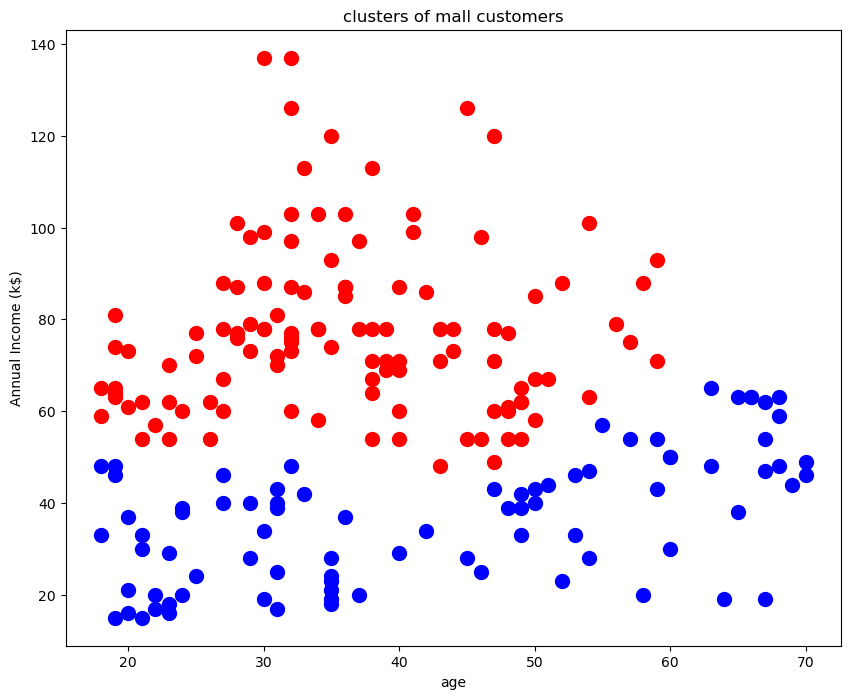

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(x[cl==0,0],x[cl==0,1],s=100,c='red',label='cluster 1')
plt.scatter(x[cl==1,0],x[cl==1,1],s=100,c='blue',label='cluster 2')
plt.title('clusters of mall customers')
plt.xlabel('age')
plt.ylabel('Annual Income (k$)')
plt.show()

In [ ]:
neigh= NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(x)
distances, indice = nbrs.kneighbors()